In [155]:
import pandas as pd
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import seaborn as sb
from sklearn.metrics import accuracy_score, classification_report, log_loss
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, log_loss
from sklearn.model_selection import train_test_split
import joblib 
from sklearn.pipeline import Pipeline


In [156]:
import nltk
nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/bshanmugam/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/bshanmugam/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [157]:
data = pd.read_csv("/Users/bshanmugam/Documents/AIENginnering/project-nlp-challenge/dataset/training_data_lowercase.csv")
data.reset_index(drop=True, inplace=True)  

data.head()
data.columns = ['label','title']
data.head()

,label,title
0,0,donald trump sends out embarrassing new year‚s...
1,0,drunk bragging trump staffer started russian c...
2,0,sheriff david clarke becomes an internet joke ...
3,0,trump is so obsessed he even has obama‚s name ...
4,0,pope francis just called out donald trump duri...


In [158]:
data = pd.read_csv("/Users/bshanmugam/Documents/AIENginnering/project-nlp-challenge/dataset/training_data_lowercase.csv")
data.reset_index(drop=True, inplace=True)  

data.head()
data.columns = ['label','title']
data.head()

,label,title
0,0,donald trump sends out embarrassing new year‚s...
1,0,drunk bragging trump staffer started russian c...
2,0,sheriff david clarke becomes an internet joke ...
3,0,trump is so obsessed he even has obama‚s name ...
4,0,pope francis just called out donald trump duri...


In [159]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34152 entries, 0 to 34151
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   label   34152 non-null  int64 
 1   title   34152 non-null  object
dtypes: int64(1), object(1)
memory usage: 533.8+ KB


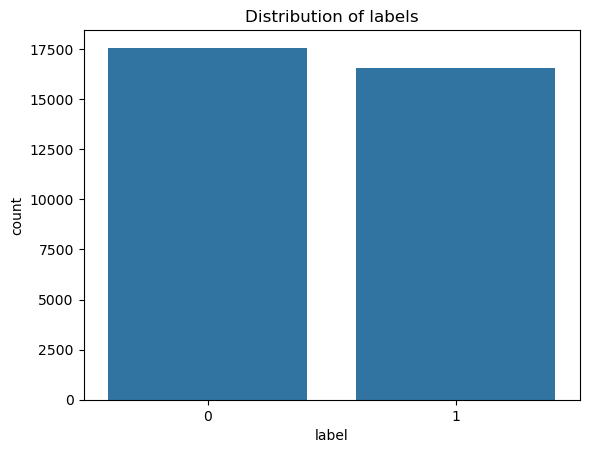

In [160]:
sb.countplot(x='label', data=data)
plt.title("Distribution of labels")
plt.show()

In [161]:
stop_words = set(stopwords.words("english"))
lemmatizer = WordNetLemmatizer()
def preprocess_text(text):
    text = text.lower()
    text = re.sub(r'[^a-zA-Z\s]', '', text)  # remove special chars and digits
    tokens = text.split()
    tokens = [lemmatizer.lemmatize(word) for word in tokens if word not in stop_words and len(word) > 2]
    return " ".join(tokens)

data['clean_title'] = data['title'].apply(preprocess_text)


In [166]:

X = data['title'] 
y = data['label']



X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)




In [167]:
pipeline = Pipeline([
    ('tfidf', TfidfVectorizer(ngram_range=(1, 2), max_features=10000)),  # MODIFIED
    ('clf', LogisticRegression(max_iter=300))  # MODIFIED
])

pipeline.fit(X_train, y_train)

Pipeline(steps=[('tfidf',
                 TfidfVectorizer(max_features=10000, ngram_range=(1, 2))),
                ('clf', LogisticRegression(max_iter=300))])

In [168]:
y_pred = pipeline.predict(X_test)

In [177]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
print("Accuracy:", accuracy_score(y_test, y_pred))



Accuracy: 0.9471526862831211


TypeError: unsupported operand type(s) for *: 'function' and 'int'

In [174]:
print("\nClassification Report:")  # NEW / MODIFIED
print(classification_report(y_test, y_pred))


Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.94      0.95      3529
           1       0.94      0.96      0.95      3302

    accuracy                           0.95      6831
   macro avg       0.95      0.95      0.95      6831
weighted avg       0.95      0.95      0.95      6831



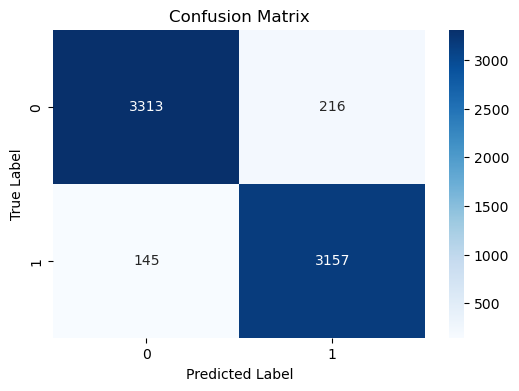

In [180]:

import seaborn as sns 
import matplotlib.pyplot as plt  

cm = confusion_matrix(y_test, y_pred)  
plt.figure(figsize=(6, 4)) 
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')  
plt.title('Confusion Matrix')  
plt.xlabel('Predicted Label')  
plt.ylabel('True Label')  
plt.show() 

In [ ]:
from sklearn.metrics import accuracy_score, log_loss

y_pred = model.predict(X_test)
y_pred_proba = model.predict_proba(X_test)

accuracy = accuracy_score(y_test, y_pred)
loss = log_loss(y_test, y_pred_proba)

print(f'Accuracy: {accuracy * 100:.2f}%')
print(f'Log Loss: {loss:.4f}')


Accuracy: 93.34%
Log Loss: 0.2204


In [181]:
joblib.dump(pipeline, 'LogisticRegression.pkl')

['LogisticRegression.pkl']

In [182]:


# Load saved pipeline
pipeline = joblib.load('LogisticRegression.pkl')




In [183]:
# Load new test data
test_data = pd.read_csv('/Users/bshanmugam/Documents/AIENginnering/project-nlp-challenge/dataset/testing_data_lowercase_nolabels.csv', header=None, names=['combined'])



test_data[['label', 'title']] = test_data['combined'].str.split('\t', n=1, expand=True)
test_data = test_data.drop(columns=['label', 'combined'])


In [184]:
print("Sample of test data (no labels):")
print(test_data.head())

Sample of test data (no labels):
                                               title
0  copycat muslim terrorist arrested with assault...
1  wow! chicago protester caught on camera admits...
2   germany's fdp look to fill schaeuble's big shoes
3  mi school sends welcome back packet warning ki...
4  u.n. seeks 'massive' aid boost amid rohingya '...


In [185]:
loaded_pipeline = joblib.load('LogisticRegression.pkl')
test_data['predicted_label'] = loaded_pipeline.predict(test_data['title'])


In [188]:
new_predictions = pipeline.predict(test_data['title'])
test_data['predicted_label'] = new_predictions
print("\nSample Predictions:")
print(test_data.head())


Sample Predictions:
                                               title  predicted_label
0  copycat muslim terrorist arrested with assault...                0
1  wow! chicago protester caught on camera admits...                0
2   germany's fdp look to fill schaeuble's big shoes                1
3  mi school sends welcome back packet warning ki...                0
4  u.n. seeks 'massive' aid boost amid rohingya '...                1


In [189]:
output_path = 'predictions_on_unlabeled_test_data.csv'
test_data.to_csv(output_path, index=False)
print(f"\nPredictions saved to: {output_path}")


Predictions saved to: predictions_on_unlabeled_test_data.csv


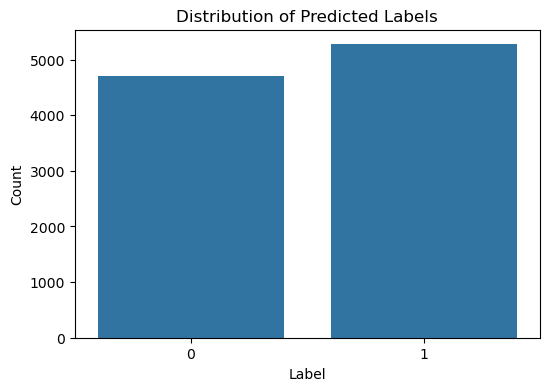

In [190]:
import seaborn as sns
import matplotlib.pyplot as plt

# Countplot of predicted labels
plt.figure(figsize=(6,4))
sns.countplot(x='predicted_label', data=test_data)
plt.title("Distribution of Predicted Labels")
plt.xlabel("Label")
plt.ylabel("Count")
plt.show()
